## Model Comparison

In [13]:
import pandas as pd
pd.DataFrame({'Accuracy' : [97.47, 100, 95.57, 96.2, 99.37, 98.73],
'Precision' : [97.8, 100, 96, 96.4, 99.4, 98.8],
'Recall' : [97.6, 100, 95.6, 96.2, 99.4, 98.8],
'F1_Score' : [97.6, 100, 95.6, 96.4, 99.4, 98.8]})

,Accuracy,Precision,Recall,F1_Score
0,97.47,97.8,97.6,97.6
1,100.00,100.0,100.0,100.0
2,95.57,96.0,95.6,95.6
3,96.20,96.4,96.2,96.4
4,99.37,99.4,99.4,99.4
5,98.73,98.8,98.8,98.8


## Confusion Matrices

In [15]:
from sklearn.metrics import confusion_matrix

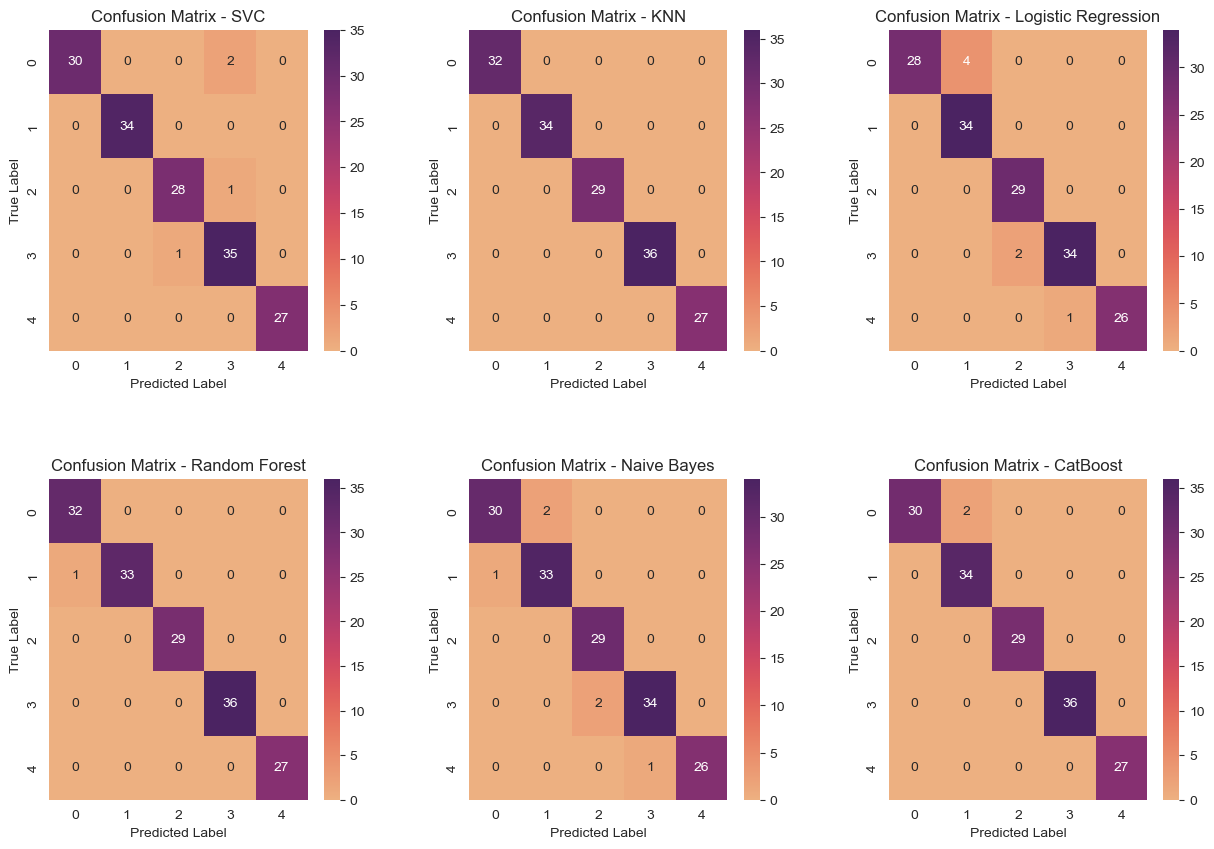

In [117]:
fig, axes = plt.subplots(2, 3, figsize=(15, 10)) 
axes = axes.flatten()

for idx, (name, model) in enumerate(models.items()):
    Y_pred = model.predict(X_test)
    cm = confusion_matrix(Y_test, Y_pred)

    sns.heatmap(cm, annot=True, fmt="d", cmap="flare", ax=axes[idx])
    axes[idx].set_title(f"Confusion Matrix - {name}")
    axes[idx].set_xlabel("Predicted Label")
    axes[idx].set_ylabel("True Label")

plt.subplots_adjust(wspace=0.3, hspace=0.4)
plt.show()

## Model performance

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

In [184]:
reports = {}

for name, model in models.items():
    Y_pred = model.predict(X_test)
    report = classification_report(Y_test, Y_pred, output_dict=True)
    
    # Extract only precision, recall, and f1-score (excluding 'support')
    class_metrics = {cls: report[str(cls)] for cls in range(5)}  # Assuming classes 0-4
    reports[name] = {f"{cls}_{metric}": round(class_metrics[cls][metric], 2) 
                     for cls in class_metrics for metric in ["precision", "recall", "f1-score"]}

# Convert to DataFrame
df_report = pd.DataFrame(reports).T

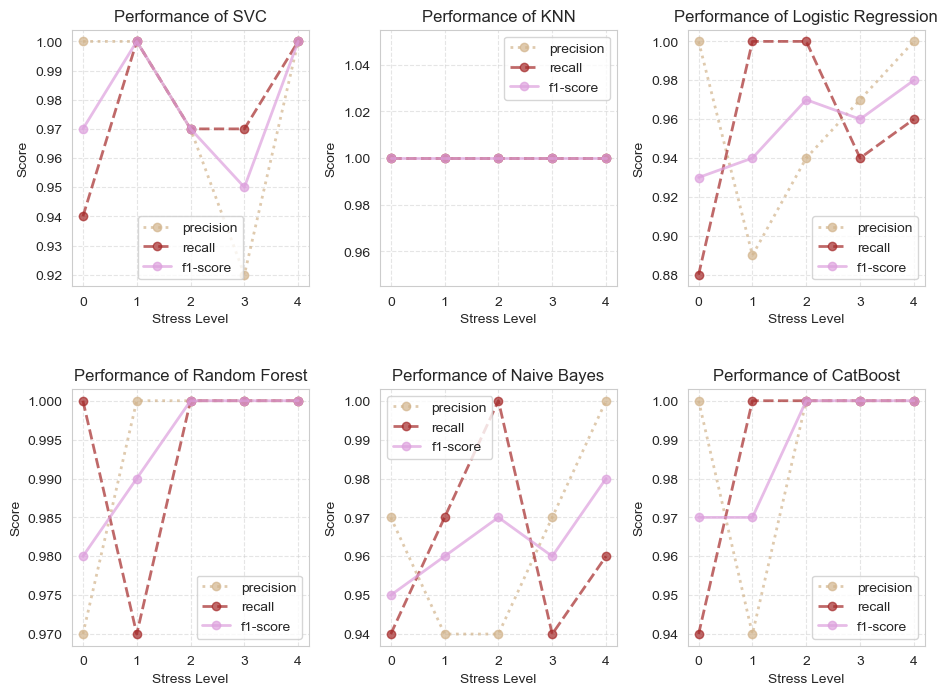

In [216]:
# Define metrics, stress levels, and colors
metrics = ["precision", "recall", "f1-score"]
colors = {"precision": "tan", "recall": "brown", "f1-score": "plum"}
linestyles = {"precision": ":", "recall": "--", "f1-score": "-"} 
stress_levels = [0, 1, 2, 3, 4] 

# Determine subplot grid size (rows, cols)
num_models = len(df_report.index)
cols = 3
rows = int(np.ceil(num_models / cols))

# Create subplots
fig, axes = plt.subplots(rows, cols, figsize=(11, 8)) 

# Flatten axes if there's more than one row
axes = axes.flatten() if num_models > 1 else [axes]

# Iterate over models and plot on subplots
for idx, model in enumerate(df_report.index):
    ax = axes[idx]  # Select the subplot

    # Extract the model's data
    model_data = df_report.loc[model]

    for metric in metrics:
        values = [model_data[f"{cls}_{metric}"] for cls in stress_levels]
        ax.plot(
            stress_levels, values, marker="o", linestyle=linestyles[metric], 
            color=colors[metric], alpha=0.7, linewidth=2, label=metric
        )

    ax.set_xticks(stress_levels)
    ax.set_xlabel("Stress Level")
    ax.set_ylabel("Score")
    ax.set_title(f"Performance of {model}")
    ax.legend()
    ax.grid(True, linestyle="--", alpha=0.5)

# Remove empty subplots if models < rows*cols
for i in range(num_models, rows * cols):
    fig.delaxes(axes[i])

# Adjust layout for better spacing
plt.subplots_adjust(wspace=0.3, hspace=0.4)
plt.show()